In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import linregress

csv = pd.read_csv('joint_data_12_to_16_noformatting.csv')

joint_df = pd.DataFrame(csv)

joint_df = joint_df.sort_values(['State','Year'], ascending=True)
joint_df = joint_df.reset_index(drop=True)
joint_df['State'].value_counts()

Florida                 3
Alaska                  3
Iowa                    3
South Carolina          3
Idaho                   3
Oregon                  3
New York                3
Nevada                  3
New Jersey              3
Nebraska                3
Kentucky                3
Hawaii                  3
Maine                   3
Kansas                  3
Ohio                    3
Illinois                3
Arizona                 3
Louisiana               3
Massachusetts           3
Connecticut             3
Arkansas                3
Maryland                3
Montana                 3
District of Columbia    3
Washington              3
Wyoming                 3
Indiana                 3
California              3
North Carolina          3
South Dakota            3
Michigan                3
New Hampshire           3
Georgia                 3
Utah                    3
Tennessee               3
Minnesota               3
Vermont                 3
Colorado                3
North Dakota

In [33]:
joint_df['Transit Rate: Solo Auto'] = joint_df['Transit: Solo Auto']/joint_df['Population']
joint_df['Transit Rate: Public Transit'] = joint_df['Transit: Public Transit']/joint_df['Population']
joint_df['Transit Rate: Walking'] = joint_df['Transit: Walking']/joint_df['Population']

In [34]:
csv2 = pd.read_csv('Demo Turnout by State 12-16.csv')

demo_turnout = pd.DataFrame(csv2)
demo_turnout


,State,Year,Total,Male,Female,White alone,.White non-Hispanic alone,black alone,Asian alone,Hispanic (of any race),White alone or in combination,black alone or in combination,Asian alone or in combination
0,ALABAMA,2012,59.9,59.2,60.6,59.3,61.9,62.8,0.0,0.0,59.7,63.2,0.0
1,ALASKA,2012,56.0,53.6,58.6,62.1,63.3,0.0,0.0,0.0,61.7,0.0,0.0
2,ARIZONA,2012,49.6,50.5,48.7,51.4,60.8,45.1,19.0,28.7,51.1,44.2,21.9
3,ARKANSAS,2012,51.1,50.9,51.4,52.7,55.5,49.4,0.0,9.5,52.7,48.5,0.0
4,CALIFORNIA,2012,47.5,45.6,49.3,48.7,61.9,58.7,35.2,31.8,48.9,58.5,36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,VIRGINIA,2016,62.6,59.7,65.3,64.8,68.0,62.0,45.4,36.2,64.9,61.2,49.1
149,WASHINGTON,2016,60.5,55.2,65.7,65.4,70.0,38.8,38.7,33.4,64.8,35.5,40.1
150,WEST VIRGINIA,2016,50.4,48.2,52.5,50.5,50.7,0.0,0.0,0.0,50.7,0.0,0.0
151,WISCONSIN,2016,68.7,66.9,70.4,71.0,73.7,45.1,0.0,33.8,70.8,43.4,43.8


In [35]:
race_12 = demo_turnout.loc[demo_turnout['Year'] == 2012,['State','White alone','black alone','Asian alone','Hispanic (of any race)']]
race_12 = race_12.rename(columns={'White alone':'2012 White Alone','black alone':'2012 Black Alone','Asian alone':'2012 Asian Alone','Hispanic (of any race)':'2012 Hispanic (of any race)'})
race_14 = demo_turnout.loc[demo_turnout['Year'] == 2014,['State','White alone','black alone','Asian alone','Hispanic (of any race)']]
race_14 = race_14.rename(columns={'White alone':'2014 White Alone','black alone':'2014 Black Alone','Asian alone':'2014 Asian Alone','Hispanic (of any race)':'2014 Hispanic (of any race)'})
race_16 = demo_turnout.loc[demo_turnout['Year'] == 2016,['State','White alone','black alone','Asian alone','Hispanic (of any race)']]
race_16 = race_16.rename(columns={'White alone':'2016 White Alone','black alone':'2016 Black Alone','Asian alone':'2016 Asian Alone','Hispanic (of any race)':'2016 Hispanic (of any race)'})
demo_turnout_combined = pd.merge(race_12,race_14,on=["State"],how="inner")
demo_turnout_combined = pd.merge(demo_turnout_combined,race_16,on=["State"],how="inner")
demo_turnout_combined

,State,2012 White Alone,2012 Black Alone,2012 Asian Alone,2012 Hispanic (of any race),2014 White Alone,2014 Black Alone,2014 Asian Alone,2014 Hispanic (of any race),2016 White Alone,2016 Black Alone,2016 Asian Alone,2016 Hispanic (of any race)
0,ALABAMA,59.3,62.8,0.0,0.0,40.4,44.9,0.0,0.0,55.6,60.2,0.0,0.0
1,ALASKA,62.1,0.0,0.0,0.0,55.5,0.0,0.0,0.0,67.7,0.0,0.0,0.0
2,ARIZONA,51.4,45.1,19.0,28.7,37.5,30.8,10.6,23.1,55.5,47.9,33.1,33.7
3,ARKANSAS,52.7,49.4,0.0,9.5,37.5,37.7,0.0,0.0,56.7,57.9,0.0,0.0
4,CALIFORNIA,48.7,58.7,35.2,31.8,33.1,29.0,21.2,17.0,50.5,46.3,38.4,32.7
5,COLORADO,67.5,49.6,26.0,38.0,57.3,38.0,0.0,31.1,66.6,67.0,20.5,37.4
6,CONNECTICUT,60.4,57.1,15.8,35.4,45.4,28.4,0.0,21.3,61.0,47.9,0.0,31.5
7,DELAWARE,64.5,60.5,0.0,0.0,44.9,40.3,0.0,0.0,60.6,55.1,0.0,0.0
8,DISTRICT OF COLUMBIA,65.3,72.6,0.0,0.0,49.1,46.1,0.0,0.0,73.7,64.8,0.0,0.0
9,FLORIDA,55.7,49.2,31.2,41.8,40.6,39.8,34.3,25.3,55.6,43.2,31.9,38.7


In [39]:
white_turnout = demo_turnout_combined[['State','2012 White Alone','2014 White Alone','2016 White Alone']]
white_turnout['Average Pres Turnout'] = (white_turnout['2012 White Alone'] + white_turnout['2016 White Alone']) / 2
white_turnout['Pres vs Mid-Term'] = white_turnout['Average Pres Turnout'] - white_turnout['2014 White Alone']
white_turnout = white_turnout.sort_values('Pres vs Mid-Term')
black_turnout = demo_turnout_combined[['State','2012 Black Alone','2014 Black Alone','2016 Black Alone']]
black_turnout['Average Pres Turnout'] = (black_turnout['2012 Black Alone'] + black_turnout['2016 Black Alone']) / 2
black_turnout['Pres vs Mid-Term'] = black_turnout['Average Pres Turnout'] - black_turnout['2014 Black Alone']
black_turnout = black_turnout.sort_values('Pres vs Mid-Term')
hispanic_turnout = demo_turnout_combined[['State','2012 Hispanic (of any race)','2014 Hispanic (of any race)','2016 Hispanic (of any race)']]
hispanic_turnout['Average Pres Turnout'] = (hispanic_turnout['2012 Hispanic (of any race)'] + hispanic_turnout['2016 Hispanic (of any race)']) / 2
hispanic_turnout['Pres vs Mid-Term'] = hispanic_turnout['Average Pres Turnout'] - hispanic_turnout['2014 Hispanic (of any race)']
hispanic_turnout = hispanic_turnout.sort_values('Pres vs Mid-Term')
hispanic_turnout

C:\Users\brock\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\brock\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\brock\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,State,2012 Hispanic (of any race),2014 Hispanic (of any race),2016 Hispanic (of any race),Average Pres Turnout,Pres vs Mid-Term
40,SOUTH CAROLINA,13.6,8.1,0.0,6.80,-1.30
0,ALABAMA,0.0,0.0,0.0,0.00,0.00
48,WEST VIRGINIA,0.0,0.0,0.0,0.00,0.00
45,VERMONT,0.0,0.0,0.0,0.00,0.00
41,SOUTH DAKOTA,0.0,0.0,0.0,0.00,0.00
34,NORTH DAKOTA,0.0,0.0,0.0,0.00,0.00
29,NEW HAMPSHIRE,0.0,0.0,0.0,0.00,0.00
26,MONTANA,0.0,0.0,0.0,0.00,0.00
24,MISSISSIPPI,0.0,0.0,0.0,0.00,0.00
19,MAINE,0.0,0.0,0.0,0.00,0.00


<BarContainer object of 51 artists>

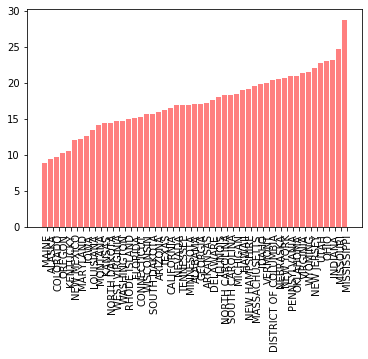

In [37]:
x_axis = np.arange(len(white_turnout))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, white_turnout["State"], rotation="vertical")
plt.bar(white_turnout['State'], white_turnout['Pres vs Mid-Term'], color='r', alpha=0.5, align="center")

<BarContainer object of 51 artists>

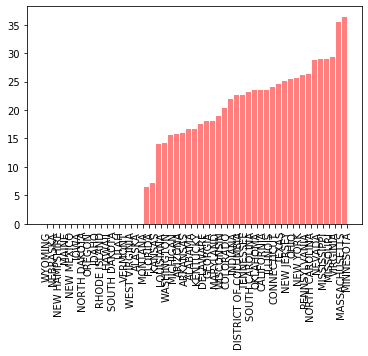

In [38]:
x_axis = np.arange(len(black_turnout))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, black_turnout["State"], rotation="vertical")
plt.bar(black_turnout['State'], black_turnout['Pres vs Mid-Term'], color='r', alpha=0.5, align="center")

<BarContainer object of 51 artists>

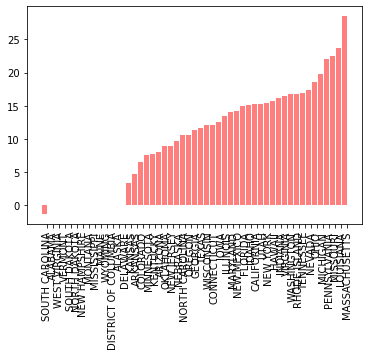

In [40]:
x_axis = np.arange(len(hispanic_turnout))
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, hispanic_turnout["State"], rotation="vertical")
plt.bar(hispanic_turnout['State'], hispanic_turnout['Pres vs Mid-Term'], color='r', alpha=0.5, align="center")

In [2]:
vote_2012 = joint_df.loc[joint_df['Year'] == 2012,:]
vote_2012.dtypes

Year                                  int64
State                                object
Median Income                       float64
Number Employed                       int64
Number Unemployed                     int64
Number Poverty                        int64
Number Families in Poverty            int64
Median Age                          float64
Population                          float64
Pop: White Only                     float64
Pop: Black Only                     float64
Pop: American Indian Only           float64
Pop: Native Hawaiian Only           float64
Pop: Two or More Races              float64
Pop: Hispanic Origin                float64
Median Home Value                   float64
Median Gross Rent                   float64
Commute Time: Public Transit        float64
Commute Time: Solo Auto             float64
Commute Time: Walking               float64
Transit: Solo Auto                  float64
Transit: Public Transit             float64
Transit: Walking                

In [ ]:
x_values = vote_2012['Median Income']
y_values = vote_2012['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,40),fontsize=15,color="red")
# plt.title('Voter Turnout by State Median Income')
# plt.xlabel('State Median Income ($)')
# plt.ylabel('Voter Turnout')
# medincome = plt.show()
# # plt.savefig('output_data/nhem_latvsmaxtemp.png')
# medincome

In [ ]:
x_values = vote_2012['Unemployment Rate']
y_values = vote_2012['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")

In [ ]:
x_values = vote_2012['Poverty Rate']
y_values = vote_2012['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")

In [ ]:
x_values = vote_2012['Transit: Solo Auto']
y_values = vote_2012['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")

In [ ]:
x_values = vote_2012['Transit: Public Transit']
y_values = vote_2012['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")

In [ ]:
x_values = vote_2012['Transit: Walking']
y_values = vote_2012['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")

In [16]:
transit_turnout_2012 = joint_df.loc[joint_df['Year'] == 2012, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit: Public Transit','Transit: Walking']]
transit_turnout_2012 = transit_turnout_2012.rename(columns={'VEP Total Ballots Counted':'2012 VEP Total Ballots Counted','Transit: Solo Auto':'2012 Transit: Solo Auto','Transit: Public Transit':'2012 Transit: Public Transit','Transit: Walking':'2012 Transit: Walking'})
transit_turnout_2016 = joint_df.loc[joint_df['Year'] == 2016, ['State','VEP Total Ballots Counted','Transit: Solo Auto','Transit: Public Transit','Transit: Walking']]
transit_turnout_2016 = transit_turnout_2016.rename(columns={'VEP Total Ballots Counted':'2016 VEP Total Ballots Counted','Transit: Solo Auto':'2016 Transit: Solo Auto','Transit: Public Transit':'2016 Transit: Public Transit','Transit: Walking':'2016 Transit: Walking'})
transit_turnout = pd.merge(transit_turnout_2012,transit_turnout_2016,on=["State"])
transit_turnout

,State,2012 VEP Total Ballots Counted,2012 Transit: Solo Auto,2012 Transit: Public Transit,2012 Transit: Walking,2016 VEP Total Ballots Counted,2016 Transit: Solo Auto,2016 Transit: Public Transit,2016 Transit: Walking
0,California,0.557,12059924.0,851099.0,441486.0,0.582,13186177.0,910353.0,481638.0
1,Colorado,0.706,1889150.0,81980.0,85695.0,0.719,2107958.0,81991.0,84470.0
2,Connecticut,0.614,1358109.0,82482.0,51475.0,0.649,1387240.0,88162.0,48896.0
3,District of Columbia,0.616,111088.0,125890.0,38795.0,0.607,119642.0,130451.0,49514.0
4,Florida,0.633,6473106.0,177143.0,127838.0,0.656,7221118.0,187114.0,137204.0
5,Georgia,0.593,3353644.0,82974.0,71148.0,0.598,3714350.0,100028.0,72701.0
6,Hawaii,0.445,437154.0,45177.0,31804.0,0.432,474495.0,47808.0,33401.0
7,Idaho,0.610,542709.0,5925.0,20109.0,0.609,597208.0,4282.0,19709.0
8,Illinois,0.593,4362024.0,506351.0,186595.0,0.631,4483475.0,573372.0,184968.0
9,Indiana,0.560,2435019.0,33311.0,64333.0,0.579,2586064.0,31443.0,66298.0


In [ ]:
solo_r_values = []
public_r_values = []
walking_r_values = []

for index,row in transit_turnout.iterrows():
    x_values = [row[2],row[6],row[10]]
    y_values = [row[1],row[5],row[9]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    solo_r_values.append(rvalue)
    x_values = [row[3],row[7],row[11]]
    y_values = [row[1],row[5],row[9]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    public_r_values.append(rvalue)
    x_values = [row[4],row[8],row[12]]
    y_values = [row[1],row[5],row[9]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    walking_r_values.append(rvalue)
    
transit_turnout['Solo Auto/Turnout R-Value'] = solo_r_values
transit_turnout['Public Transit/Turnout R-Value'] = public_r_values
transit_turnout['Walking/Turnout R-Value'] = walking_r_values
transit_turnout

In [18]:
joint_df_colorado = joint_df.loc[joint_df['State'] == 'Colorado',:]
joint_df_illinois = joint_df.loc[joint_df['State'] == 'Illinois',:]
joint_df_colorado

,Year,State,Median Income,Number Employed,Number Unemployed,Number Poverty,Number Families in Poverty,Median Age,Population,Pop: White Only,...,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted (Estimate),Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Transit Rate: Solo Auto,Transit Rate: Public Transit,Transit Rate: Walking
41,2016,Colorado,65685.0,2827340,140434,598736,94425,36.7,5540545.0,4654921.0,...,0.719,0.700,0.646,2859216.0,2780247.0,3974405,4305728,0.380460,0.014798,0.015246
50,2014,Colorado,61303.0,2699282,155638,630786,105560,36.3,5355866.0,4520381.0,...,0.547,0.537,0.494,2080071.0,2041020.0,3800664,4128890,0.378602,0.016497,0.013323
94,2012,Colorado,56765.0,2559194,216624,694842,118607,36.2,5187582.0,4376673.0,...,0.706,0.699,0.645,2596173.0,2569522.0,3675871,3981208,0.364168,0.015803,0.016519


The r-squared is: 0.7169347772556445


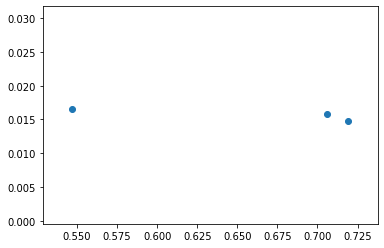

In [31]:
x_values = joint_df_colorado['VEP Total Ballots Counted']
y_values = joint_df_colorado['Transit Rate: Public Transit']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

In [ ]:
for row in transit_turnout:
    r_value = []
    